In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

## Функція гіпотези лінійної регресії у векторному вигляді

In [2]:
def h(w_0, w_1, x):
    return w_0 + w_1*x

## Функція для обчислення функції втрат у векторному вигляді

In [3]:
def loss_function(w_0, w_1, df):
    
    n = df.area.shape[0]
    cost = 0
    
    for x, y in zip(df.area, df.price):
        cost = cost + (h(w_0, w_1, x) - y)**2
        
    return cost/(2*n)

## Один крок градієнтного спуску

In [4]:
def gradient_step(w_0, w_1, grad_0, grad_1, learning_rate = 0.001):

    w_0 = w_0 - learning_rate*grad_0
    w_1 = w_1 - learning_rate*grad_1

    return w_0, w_1

In [5]:
def gradient_descent(weights, df, num_iter, learning_rate = 0.001, epsilon = 0.0000000001):

    w_0, w_1 = weights
    loss = loss_function(w_0, w_1, df)
    loss_history = [loss]

    for i in range(num_iter):

        d_w_0 = grad_w_0(w_0, w_1, df)
        d_w_1 = grad_w_1(w_0, w_1, df)
        w_0, w_1 = gradient_step(w_0, w_1, d_w_0, d_w_1, learning_rate = learning_rate)
        loss = loss_function(w_0, w_1, df)

        if abs(loss-loss_history[-1]) < epsilon:
            loss_history.append(loss)
            break

        loss_history.append(loss)

    return w_0, w_1, loss_history

## Прогноз ціни на будинок

In [6]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


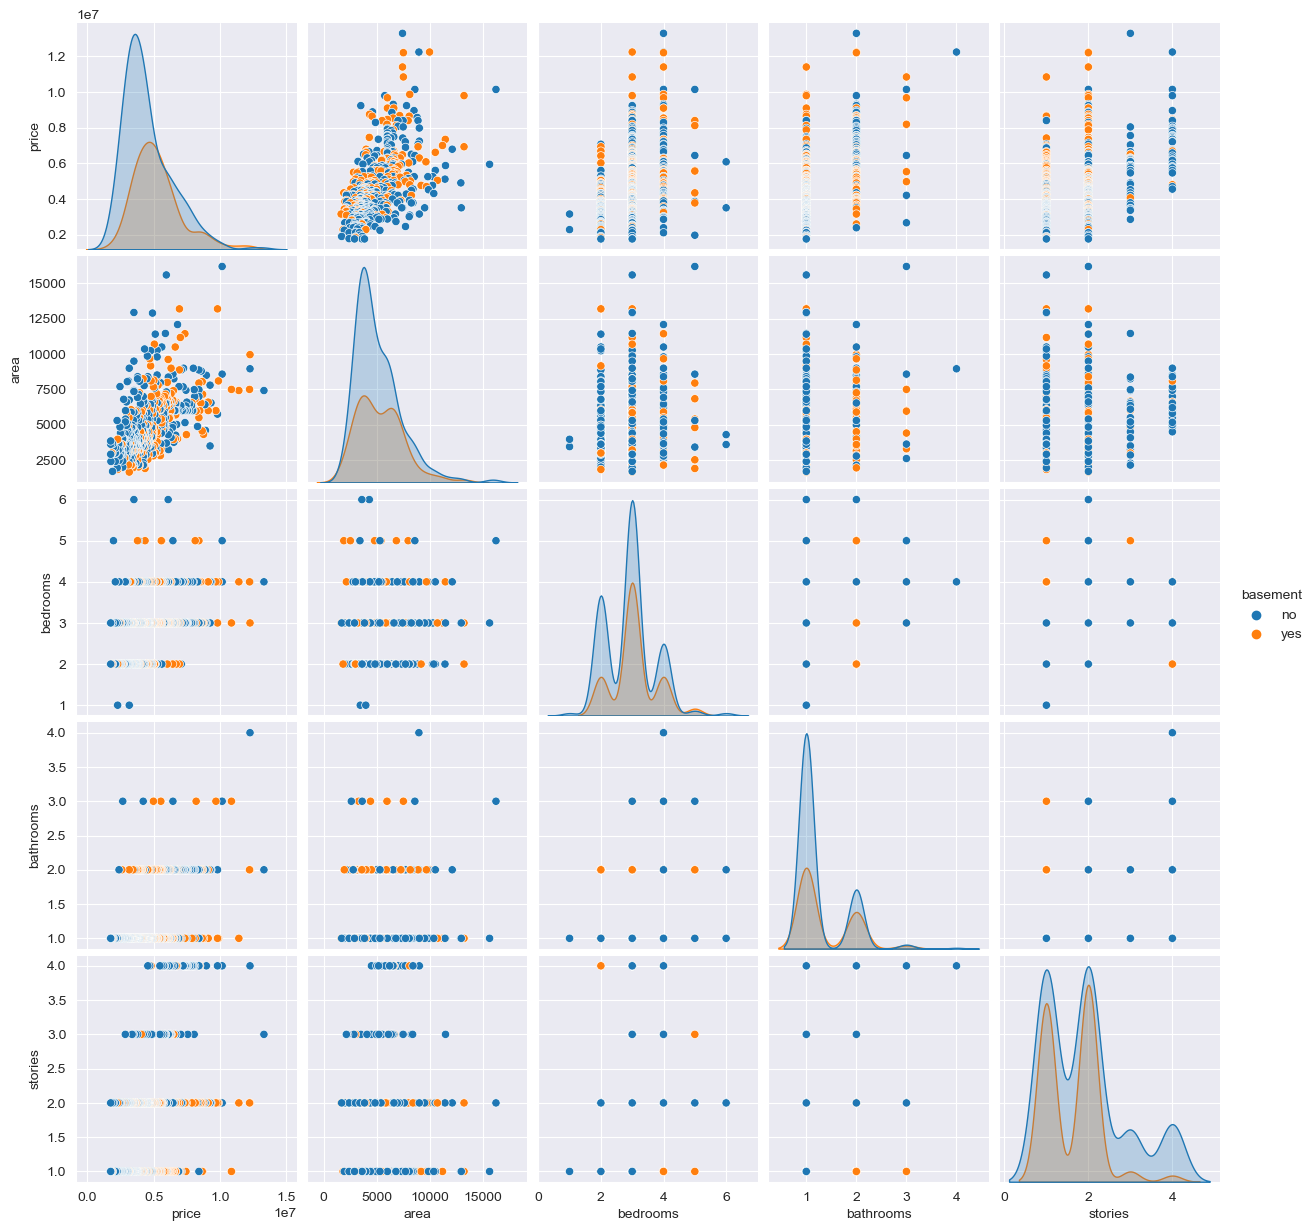

In [7]:
sns.set_style('darkgrid')

sns.pairplot(df,
            vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories'],
            hue = 'basement')
plt.show()

In [8]:
df_corr = df[['price', 'area', 'bedrooms', 'bathrooms']].corr()
df_corr

,price,area,bedrooms,bathrooms
price,1.000000,0.535997,0.366494,0.517545
area,0.535997,1.000000,0.151858,0.193820
bedrooms,0.366494,0.151858,1.000000,0.373930
bathrooms,0.517545,0.193820,0.373930,1.000000


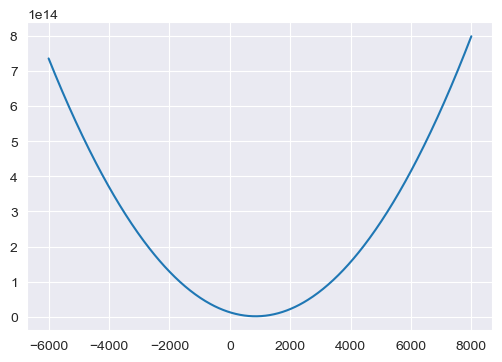

In [9]:
w_0 = 0

w_1 = np.linspace(-6000, 8000, 500)
plt.figure(figsize=(6, 4))
plt.plot(w_1, [loss_function(w_0, w, df) for w in w_1])

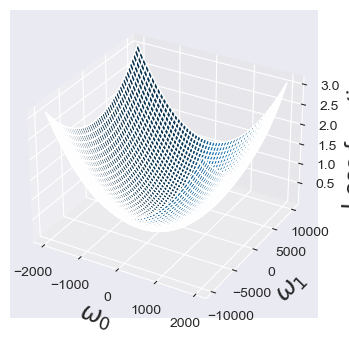

In [19]:
grid_w_0 = np.arange(-2000, 2000, 10)
grid_w_1 = np.arange(-10000, 10000, 20)

w_0, w_1 = np.meshgrid(grid_w_0, grid_w_1)

z = loss_function(w_0, w_1, norm)

fig = plt.figure(figsize = (6, 4))
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(w_0, w_1, z)
ax.set_xlabel(r'$\omega_0$', fontsize=18)
ax.set_ylabel(r'$\omega_1$', fontsize=18)
ax.set_zlabel('Loss function', fontsize=18)
plt.show()

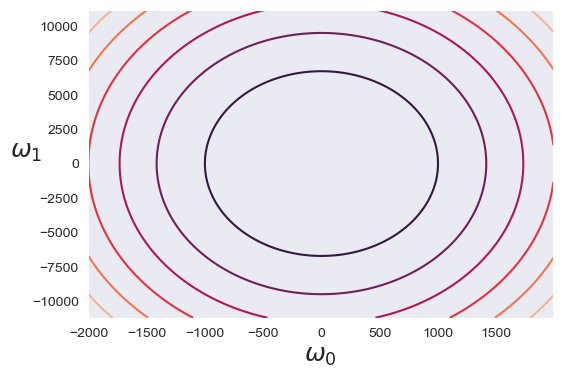

In [20]:
plt.figure(figsize = (6, 4))

grid_w_0 = np.arange(-2000, 2000, 10)
grid_w_1 = np.arange(-11200, 11200, 20)

w_0, w_1 = np.meshgrid(grid_w_0, grid_w_1)

z = loss_function(w_0, w_1, norm)


plt.contour(w_0, w_1, z)
plt.xlabel(r'$\omega_0$', fontsize=18)
plt.ylabel(r'$\omega_1$', fontsize=18, rotation = 0)
plt.grid()

## Нормалізація даних

In [7]:
def normalization(data):

    mean = np.mean(data)
    value_range = np.max(data) - np.min(data)
    result = []
    for x in data:
        norm_x = (x - mean)/value_range
        result.append(norm_x)
  
    return result

norm = pd.DataFrame()

norm['price'] = normalization(df.price)
norm['area'] = normalization(df.area)
norm['bedrooms'] = normalization(df.bedrooms)
norm['bathrooms'] = normalization(df.bathrooms)

norm.tail(5)

,price,area,bedrooms,bathrooms
540,-0.255128,-0.147804,-0.193028,-0.095413
541,-0.259704,-0.189041,0.006972,-0.095413
542,-0.261189,-0.105192,-0.193028,-0.095413
543,-0.261189,-0.153989,0.006972,-0.095413
544,-0.261189,-0.089384,0.006972,-0.095413


In [8]:
def grad_w_0(w_0, w_1, df):

    n = df.area.shape[0]
    cost = 0

    for x, y in zip(df.area, df.price):
        cost = cost + (h(w_0, w_1, x) - y)

    return cost/n

def grad_w_1(w_0, w_1, df):

    n = df.area.shape[0]
    cost = 0

    for x, y in zip(df.area, df.price):
        cost = cost + (h(w_0, w_1, x) - y)*x

    return cost/n

## Модель навчання

In [9]:
w_0, w_1, history = gradient_descent((0., 0.), norm, 1000, learning_rate = 0.1)

## Модель донавчання

In [10]:
w_0, w_1, history_ext = gradient_descent((w_0, w_1), norm, 1000, learning_rate = 0.1)

In [20]:
w_0, w_1, history_ext

(4.210189791089982e-17,
 0.5751442606066763,
 [0.009372483963024389,
  0.009372288363507805,
  0.009372093631687353,
  0.009371899763713831,
  0.009371706755755138,
  0.009371514603996198,
  0.009371323304638815,
  0.009371132853901669,
  0.009370943248020226,
  0.009370754483246624,
  0.00937056655584962,
  0.009370379462114544,
  0.009370193198343223,
  0.009370007760853857,
  0.009369823145980971,
  0.009369639350075388,
  0.009369456369504087,
  0.009369274200650209,
  0.00936909283991285,
  0.009368912283707178,
  0.009368732528464223,
  0.009368553570630808,
  0.00936837540666959,
  0.009368198033058888,
  0.009368021446292611,
  0.009367845642880278,
  0.009367670619346851,
  0.009367496372232723,
  0.009367322898093645,
  0.009367150193500604,
  0.009366978255039836,
  0.009366807079312756,
  0.009366636662935749,
  0.009366467002540294,
  0.00936629809477283,
  0.009366129936294581,
  0.009365962523781675,
  0.009365795853924937,
  0.009365629923429883,
  0.00936546472901661,


## Візуалізація результату тренування

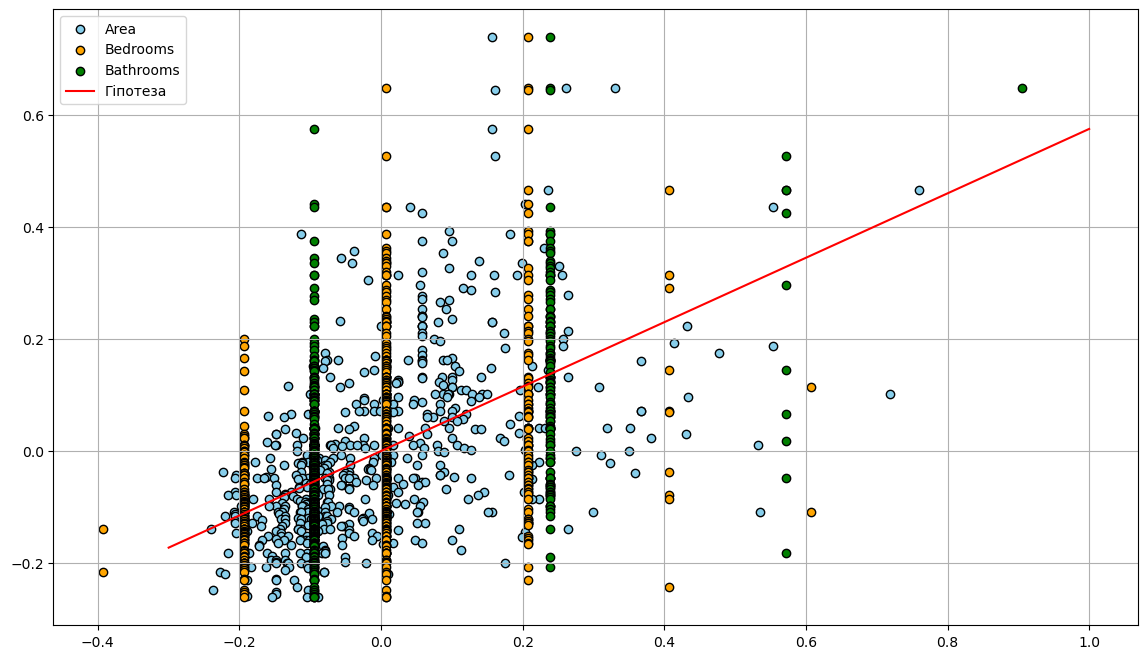

In [11]:
plt.figure(figsize=(14, 8))
plt.scatter(norm.area, norm.price, color='skyblue', label='Area', edgecolors='black')  # area vs. price
plt.scatter(norm.bedrooms, norm.price, color='orange', label='Bedrooms', edgecolors='black')  # bedrooms vs. price
plt.scatter(norm.bathrooms, norm.price, color='green', label='Bathrooms', edgecolors='black')  # bathrooms vs. price

x = np.linspace(-0.3, 1, 500)
plt.plot(x, h(w_0, w_1, x), color='red', label='Гіпотеза')
plt.grid()
plt.legend()
plt.show()


In [19]:
X = df[['area', 'bedrooms', 'bathrooms']]
y = df['price']

X['bias'] = 1

X_T = np.transpose(X)
X_T_X = np.dot(X_T, X)
X_T_X_inv = np.linalg.inv(X_T_X)
X_T_y = np.dot(X_T, y)
beta = np.dot(X_T_X_inv, X_T_y)

print("Parameters:", beta)

Parameters: [ 3.78762754e+02  4.06820034e+05  1.38604950e+06 -1.73171608e+05]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18944\116802766.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bias'] = 1
